# Python Basics

These assignments aim to get you acquainted with Python, which is an important requirement for all the research done at Solarillion Foundation. Apart from teaching you Python, these assignments also aim to make you a better programmer and cultivate better coding practices. 

Visit these links for more details: <br>
PEP8 Practices: https://www.python.org/dev/peps/pep-0008/ <br>
Check PEP8: http://pep8online.com <br>
Python Reference: https://www.py4e.com/lessons <br>

Do use Google efficiently, and refer to StackOverflow for clarifying any programming doubts. If you're still stuck, feel free to ask a TA to help you.

Each task in the assignment comprises of at least two cells. There are function definitions wherein you will name the function(s), and write code to solve the problem at hand. You will call the function(s) in the last cell of each task, and check your output.

We encourage you to play around and learn as much as possible, and be as creative as you can get. More than anything, have fun doing these assignments. Enjoy!

# Important
* **Only the imports and functions must be present when you upload this notebook to GitHub for verification.** 
* **Do not upload it until you want to get it verified. Do not change function names or add extra cells or code, or remove anything.**
* **For your rough work and four showing your code to TAs, use a different notebook with the name Module2Playground.ipynb and copy only the final functions to this notebook for verification.**

# Module 2
Scope: NumPy, pandas, pickle, matplotlib, File operations

## Imports - Always Execute First!
Import any modules and turn on any magic here:

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import random
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic("load_ext", "pycodestyle_magic")
    ipy.run_line_magic("pycodestyle_on", "")
    ipy.run_line_magic("matplotlib", "inline")

## Task 1

Basics of NumPy, pandas, pickle and matplotlib.

**Question 1**

In [ ]:
"""
    Read the pickle file 'Data/Stress.pkl' and transform the contents into a
    a pandas DataFrame of the following form:
    
            +------+------+------+-----+------+-------+
            | ACCx | ACCy | ACCz | ECG | RESP | LABEL |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+

            Shape: (700, 6)

    Save this DataFrame as a CSV file.

    Modules
    -------
    pickle, pandas
    
    Lookups
    -------
    NumPy and pandas basics (Check the Lookups folder)
    Try to complete the tasks in the Lookups, and play around with the notebooks.
"""        

In [98]:
def pickle_to_csv(filename):
    """
        Function: pickle_to_csv(filename)
        Parameters: filename (String)
        Save: DataFrame as `Stress.csv` in folder `Data`
        Return: DataFrame
    """
    with open(filename , 'rb') as f:
        content = pkl.load(f)
    
    df = pd.DataFrame(content['signal'])
    df['ECG']=df['ECG'].apply(lambda x: x[0])
    df['RESP']=df['RESP'].apply(lambda x: x[0])
    df['LABEL']=df['LABEL'].apply(lambda x: x[0])
    df['ACCx']=df['ACC'].str[0]
    df['ACCy']=df['ACC'].str[1]
    df['ACCz']=df['ACC'].str[2]
    df = df.drop(['ACC'],axis=1)
    return df

8:23: E203 whitespace before ','
10:1: W293 blank line contains whitespace
12:14: E225 missing whitespace around operator
13:15: E225 missing whitespace around operator
14:16: E225 missing whitespace around operator
15:15: E225 missing whitespace around operator
16:15: E225 missing whitespace around operator
17:15: E225 missing whitespace around operator
18:25: E231 missing whitespace after ','


In [99]:
# Call your function here 
df = pickle_to_csv('./data/Stress.pkl')
df

,ECG,RESP,LABEL,ACCx,ACCy,ACCz
0,0.021423,-1.148987,0.0,0.9554,-0.2220,-0.5580
1,0.020325,-1.124573,0.0,0.9258,-0.2216,-0.5538
2,0.016525,-1.152039,0.0,0.9082,-0.2196,-0.5392
3,0.016708,-1.158142,0.0,0.8974,-0.2102,-0.5122
4,0.011673,-1.161194,0.0,0.8882,-0.2036,-0.4824
...,...,...,...,...,...,...
695,0.003479,2.299500,7.0,0.9134,-0.1400,0.1074
696,0.000778,2.305603,7.0,0.9092,-0.1394,0.0994
697,-0.001694,2.297974,7.0,0.9084,-0.1414,0.0934
698,-0.003799,2.354431,7.0,0.9116,-0.1416,0.0958


1:26: W291 trailing whitespace


**Question 2**

In [ ]:
"""
    Find the number of occurrences of each unique value in `LABEL` (count of values).
    
    Add a column `BINARY` to the DataFrame which contains 1 if `LABEL` is 2,
    else 0.
    
    Find the mean, minimum, maximum and standard deviation of `RESP` for each value in `LABEL`.
"""

In [100]:
def count_unique(dataframe):
    """
        Function 1: count_unique(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: dict containing count of values in `LABEL`
    """
    return dataframe['LABEL'].value_counts().to_dict()

In [101]:
# Call your function here
count_unique(df)

{0.0: 100, 1.0: 100, 2.0: 100, 6.0: 100, 4.0: 100, 3.0: 100, 7.0: 100}

In [102]:
def add_binary(dataframe):
    """
        Function 2: add_binary(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: DataFrame (updated, containing `BINARY`)
    """
    lis = [1 if i==2 else 0 for i in dataframe['LABEL']]
    dataframe['BINARY'] = lis
    return dataframe

7:18: E225 missing whitespace around operator


In [103]:
# Call your function here
add_binary(df)

,ECG,RESP,LABEL,ACCx,ACCy,ACCz,BINARY
0,0.021423,-1.148987,0.0,0.9554,-0.2220,-0.5580,0
1,0.020325,-1.124573,0.0,0.9258,-0.2216,-0.5538,0
2,0.016525,-1.152039,0.0,0.9082,-0.2196,-0.5392,0
3,0.016708,-1.158142,0.0,0.8974,-0.2102,-0.5122,0
4,0.011673,-1.161194,0.0,0.8882,-0.2036,-0.4824,0
...,...,...,...,...,...,...,...
695,0.003479,2.299500,7.0,0.9134,-0.1400,0.1074,0
696,0.000778,2.305603,7.0,0.9092,-0.1394,0.0994,0
697,-0.001694,2.297974,7.0,0.9084,-0.1414,0.0934,0
698,-0.003799,2.354431,7.0,0.9116,-0.1416,0.0958,0


In [104]:
def compute_resp(dataframe):
    """
        Function 3: compute_resp(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: dict containing mean, min, max and standard deviation of `RESP`
                for each value in `LABEL`
        Dictionary Format: {label_value: [mean, min, max, std_dev]}
        Example: {1: [1, 0, 2, 1], 2: [0, -1, 1, 1], ... }
    """
    res = {}
    ul = dataframe['LABEL'].unique()
    gpdf = dataframe.groupby(['LABEL'])
    for i in ul:
        reslis =[]
        reslis.append(gpdf.get_group(i).mean()['RESP'])
        reslis.append(gpdf.get_group(i).min()['RESP'])
        reslis.append(gpdf.get_group(i).max()['RESP'])
        reslis.append(gpdf.get_group(i).std()['RESP'])
        res[i] = reslis
    return res

14:17: E225 missing whitespace around operator


In [105]:
# Call your function here
compute_resp(df)

{0.0: [-1.19342041015625,
  -1.39617919921875,
  -1.12457275390625,
  0.04224704631603914],
 1.0: [0.7134246826171875,
  -0.23345947265625,
  1.19171142578125,
  0.2955339157237469],
 2.0: [-1.0665130615234375,
  -1.63116455078125,
  -0.86517333984375,
  0.12823314954549292],
 6.0: [0.084747314453125,
  -0.4180908203125,
  0.16632080078125,
  0.08561486266706556],
 4.0: [-2.1305999755859375,
  -2.54364013671875,
  -2.00042724609375,
  0.08807708808175198],
 3.0: [-0.5306396484375,
  -1.27105712890625,
  -0.09918212890625,
  0.24397469864245047],
 7.0: [1.1905059814453125,
  -0.00457763671875,
  2.35595703125,
  0.6931962371698447]}

**Question 3**

In [10]:
"""
    Plot `RESP` using matplotlib (pyplot):
    - First, just plot the raw values.
    - Next, try using different colours for data points based on `BINARY`.
    - Experiment and come up with a useful plot.
"""

'\n    Plot `RESP` using matplotlib (pyplot):\n    - First, just plot the raw values.\n    - Next, try using different colours for data points based on `BINARY`.\n    - Experiment and come up with a useful plot.\n'

In [106]:
def plot_raw(dataframe):
    """
        Function 1: plot_raw(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Output: Plot
    """
    mpl.pyplot.hist(dataframe['RESP'],)

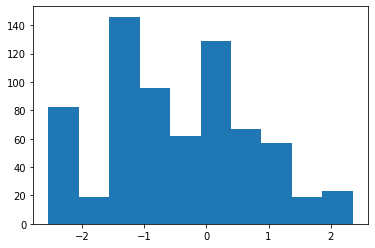

In [107]:
# Call your function here
plot_raw(df)

In [126]:
def plot_coloured(dataframe):
    """
        Function 2: plot_coloured(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Output: Plot
    """
    plt.figure(figsize=(20,10))
    plt.scatter(dataframe['RESP'], dataframe['ECG'], c=dataframe['BINARY'])
    plt.show()
    

7:27: E231 missing whitespace after ','
10:1: W293 blank line contains whitespace


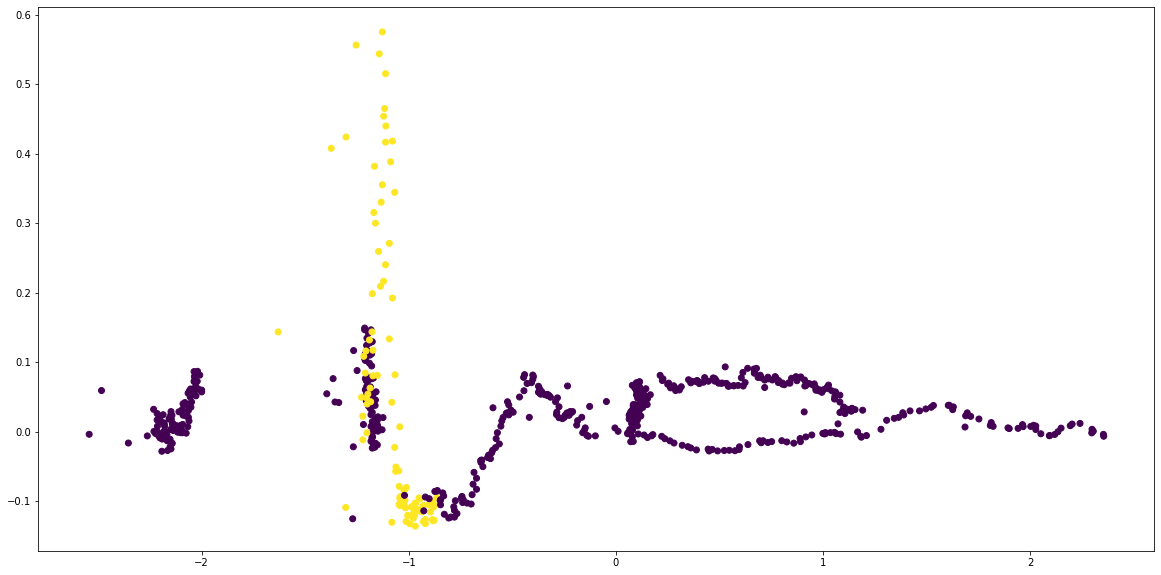

In [127]:
# Call your function here
plot_coloured(df)

## Task 2

Some simple file operations.

In [ ]:
"""
    Generate a text file containing 50 integer elements between 1 and 20 (use `random`). 
    Identify the unique numbers and the number of their occurrences, and write this into 
    a new text file.
    
    Example
    -------
    
    Generated File
    --------------
    1 2 3 4 3 2 1 ...
    
    Count File
    ----------
    1 - 2
    2 - 2
    3 - 2
    4 - 1
    ...
"""

In [94]:
def random_numbers():
    """
        Function: random_numbers()
        Save: `Numbers.txt` containing the 50 integers,
              `Count.txt` containing the count of unique integers
    """
    from collections import Counter
    with open('./Numbers.txt' , 'w') as f:
        for i in range(50):
            n = random.randint(1 , 20)
            f.write(str(n) + ' ')
    with open('./Numbers.txt' , 'r') as f:
        res = f.read() 
        print('Generated File')
        print('----------------------')
        print(res)
        ct = [int(i) for i in res.split(" ") if i!='']
        ct = Counter(ct)
    with open('./Count.txt','w') as f:
        for key in dict(ct):
            f.write(f'{key} - {ct[key]}\n')
    with open('./Count.txt','r') as f:
        res = f.read()  
        print('Count File')
        print('----------------------')
        print(res)
        

8:30: E203 whitespace before ','
10:33: E203 whitespace before ','
12:30: E203 whitespace before ','
13:23: W291 trailing whitespace
17:50: E225 missing whitespace around operator
19:28: E231 missing whitespace after ','
22:28: E231 missing whitespace after ','
23:23: W291 trailing whitespace
27:1: W293 blank line contains whitespace


In [95]:
# Call your function here
random_numbers()

Generated File
----------------------
6 19 13 6 13 19 6 13 16 13 10 17 1 20 2 16 2 1 4 20 18 16 10 20 2 12 9 19 3 20 4 13 18 15 5 1 12 8 16 3 20 7 18 4 2 7 9 16 1 5 
Count File
----------------------
6 - 3
19 - 3
13 - 5
16 - 5
10 - 2
17 - 1
1 - 4
20 - 5
2 - 4
4 - 3
18 - 3
12 - 2
9 - 2
3 - 2
15 - 1
5 - 2
8 - 1
7 - 2



Once you're done, move on to Module 3. Great job!